In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
train_data_path = '/home/student/data/train'
test_data_path = '/home/student/data/test'

train_files = os.listdir(train_data_path)
train_files[0]

'patient_10022.psv'

In [3]:
with open(os.path.join(train_data_path, train_files[0]), 'r') as f:
    print(f.readline())

HR|O2Sat|Temp|SBP|MAP|DBP|Resp|EtCO2|BaseExcess|HCO3|FiO2|pH|PaCO2|SaO2|AST|BUN|Alkalinephos|Calcium|Chloride|Creatinine|Bilirubin_direct|Glucose|Lactate|Magnesium|Phosphate|Potassium|Bilirubin_total|TroponinI|Hct|Hgb|PTT|WBC|Fibrinogen|Platelets|Age|Gender|Unit1|Unit2|HospAdmTime|ICULOS|SepsisLabel



In [4]:
data = []
for f in train_files[:200]:
    data.append(pd.read_csv(os.path.join(train_data_path, f), sep='|'))
data[0].head(10)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,1,0
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,2,0
2,54.0,97.0,36.4,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,3,0
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,4,0
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,5,0
5,60.0,97.0,NaN,125.0,54.0,30.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,6,0
6,56.0,97.0,38.0,124.0,54.0,30.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,7,0
7,60.5,96.0,NaN,114.0,50.0,37.0,26.5,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,8,0
8,64.0,97.0,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,9,0
9,63.0,98.0,NaN,130.0,56.5,31.5,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77,0,NaN,NaN,-679.93,10,0


In [6]:
data[0].std()

HR                  3.937591e+00
O2Sat               1.081216e+00
Temp                5.996030e-01
SBP                 1.194143e+01
MAP                 1.009041e+01
DBP                 1.440631e+01
Resp                4.031413e+00
EtCO2                        NaN
BaseExcess                   NaN
HCO3                         NaN
FiO2                3.535534e-02
pH                  4.949747e-02
PaCO2               8.485281e+00
SaO2                9.192388e-01
AST                          NaN
BUN                 4.242641e+00
Alkalinephos                 NaN
Calcium             0.000000e+00
Chloride                     NaN
Creatinine          1.131371e-01
Bilirubin_direct             NaN
Glucose             2.854412e+01
Lactate                      NaN
Magnesium                    NaN
Phosphate           6.363961e-01
Potassium           0.000000e+00
Bilirubin_total              NaN
TroponinI                    NaN
Hct                 2.333452e+00
Hgb                 2.121320e-01
PTT       

In [29]:
sepsis = []
for i, df in enumerate(data):
    if (df['SepsisLabel'] == 1).any():
        sepsis.append(i)
        first_sepsis_idx = df['SepsisLabel'].idxmax()
        data[i] = df[:first_sepsis_idx+1]

In [33]:
data[sepsis[3]]

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,1,0
1,88.0,100.0,NaN,83.0,52.0,42.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,2,0
2,98.0,100.0,NaN,110.0,75.0,58.0,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,3,0
3,94.0,100.0,37.39,112.0,76.0,58.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,4,0
4,97.0,100.0,NaN,125.0,88.0,69.0,14.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,108.0,94.0,NaN,126.0,69.0,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,70,0
70,102.0,94.0,NaN,117.0,62.0,NaN,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,71,0
71,96.0,98.0,37.50,123.0,66.0,NaN,9.0,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,72,0
72,98.0,NaN,NaN,124.5,67.0,NaN,11.5,NaN,NaN,NaN,...,NaN,NaN,NaN,30.07,0,NaN,NaN,-1417.86,73,0


In [9]:
if (sepsis['SepsisLabel'] == 1).anysepsis['SepsisLabel'].idxmax()

2

In [12]:
t = torch.from_numpy(data[0].to_numpy())
t.shape
len(t)

52

In [7]:
data[0].isna().any().any()

True

In [5]:
i = 0
for df in data:
    i += df.SepsisLabel.max()
i, len(data), 1-i/len(data)

(11, 200, 0.945)

In [6]:
X = pd.concat(data)
X

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,1,0
1,58.5,96.0,NaN,133.0,54.0,30.0,28.5,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,2,0
2,54.0,97.0,36.40,128.0,58.0,36.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,3,0
3,58.0,97.0,NaN,116.0,50.0,28.0,21.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,4,0
4,58.0,98.0,NaN,128.0,65.0,49.0,32.0,NaN,NaN,NaN,...,NaN,NaN,NaN,77.00,0,NaN,NaN,-679.93,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,89.0,94.0,NaN,121.0,75.0,56.0,18.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,36,0
36,93.0,92.0,NaN,124.0,71.0,47.0,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,37,0
37,102.0,88.0,NaN,109.0,67.0,48.0,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,38,0
38,94.0,93.0,36.94,127.0,74.0,50.0,23.0,NaN,NaN,NaN,...,NaN,NaN,NaN,62.53,1,NaN,NaN,-0.03,39,0


In [7]:
missing = np.sum(X.isna(), axis=0) / len(X)
missing

HR                  0.107731
O2Sat               0.145124
Temp                0.671877
SBP                 0.150896
MAP                 0.130215
DBP                 0.296621
Resp                0.152339
EtCO2               0.967777
BaseExcess          0.958158
HCO3                0.965613
FiO2                0.925574
pH                  0.941085
PaCO2               0.953709
SaO2                0.966334
AST                 0.985211
BUN                 0.934472
Alkalinephos        0.984850
Calcium             0.940964
Chloride            0.962246
Creatinine          0.941926
Bilirubin_direct    0.999279
Glucose             0.820488
Lactate             0.975231
Magnesium           0.940483
Phosphate           0.966574
Potassium           0.907539
Bilirubin_total     0.986053
TroponinI           0.987856
Hct                 0.918721
Hgb                 0.932067
PTT                 0.977877
WBC                 0.940724
Fibrinogen          0.994950
Platelets           0.945894
Age           

<BarContainer object of 41 artists>

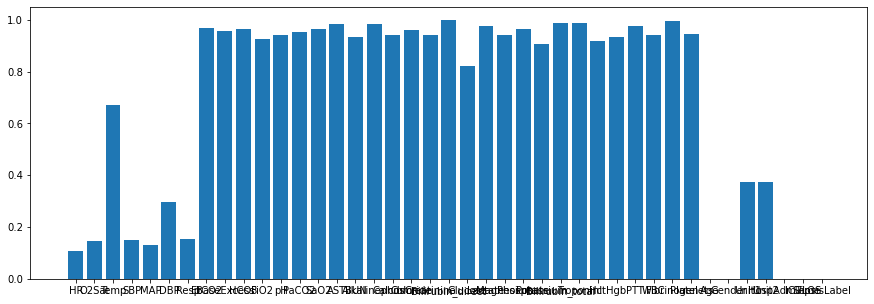

In [8]:
m = dict(missing)
plt.figure(figsize=(15,5))
plt.bar(m.keys(), m.values())


In [9]:
data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HR                44 non-null     float64
 1   O2Sat             39 non-null     float64
 2   Temp              7 non-null      float64
 3   SBP               49 non-null     float64
 4   MAP               48 non-null     float64
 5   DBP               49 non-null     float64
 6   Resp              46 non-null     float64
 7   EtCO2             0 non-null      float64
 8   BaseExcess        0 non-null      float64
 9   HCO3              0 non-null      float64
 10  FiO2              2 non-null      float64
 11  pH                2 non-null      float64
 12  PaCO2             2 non-null      float64
 13  SaO2              2 non-null      float64
 14  AST               0 non-null      float64
 15  BUN               2 non-null      float64
 16  Alkalinephos      0 non-null      float64
 17 

In [22]:
features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP','Resp', 'Age', 'Gender', 'SepsisLabel']
physiological = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP','Resp']

i = 1
# if data[i][physiological].isna().iloc[0].all():

[None, 1, 2, None, 4, None, 5, 6, None]


True

In [73]:
x = [None, None, 1, 2, None, None, 4, None, 5, 6, None]

def wsum(v:list) -> float:
    """
    weighted sum of [(w1,x1), (w2,x2),...]
    where wi is the weight of x1
    """
    s = 0
    ws = 0
    if len(v) == 0:
        return 0

    for w,x in v:
        s += w*x
        ws += w
    return s / ws

def impute_window_avg(x, w_size=1, decay=2):
    n = len(x)
    _x = x.copy()
    for i in range(len(x)):
        v = []
        if np.isnan(x[i]):
            k = 0
            while len(v) == 0:
                for j in range(1,w_size+k):
                    if i-j>0 and not np.isnan(x[i-j]):
                        v.append(((1/j)**decay, x[i-j]))
                    if i+j < n and not np.isnan(x[i+j]):
                        v.append(((1/j)**decay, x[i+j]))
                if len(v) > 0:
                    _x[i] = wsum(v)
                k += 1
    return _x

In [77]:
data[0]['_HR'] = impute_window_avg(data[0]['HR'])
data[0][['HR', '_HR']]

,HR,_HR
0,NaN,58.50
1,58.5,58.50
2,54.0,54.00
3,58.0,58.00
4,58.0,58.00
5,60.0,60.00
6,56.0,56.00
7,60.5,60.50
8,64.0,64.00
9,63.0,63.00


<AxesSubplot:>

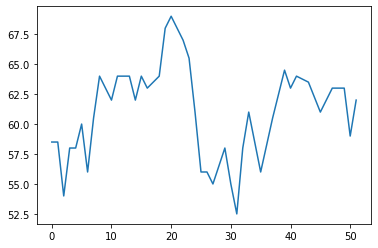

In [78]:
data[0]._HR.plot()

<AxesSubplot:>

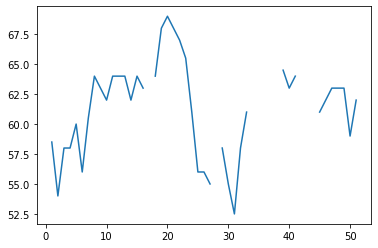

In [79]:
data[0].HR.plot()

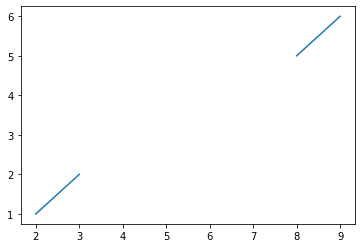

In [41]:
plt.plot(x)

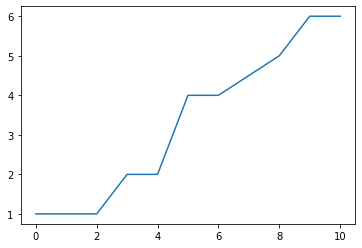

In [42]:
plt.plot(_x)

In [31]:
wsum([(1,10), (0.5, 3)]), (1*10 + 0.5*3) / 1.5

(7.666666666666667, 7.666666666666667)

<AxesSubplot:>

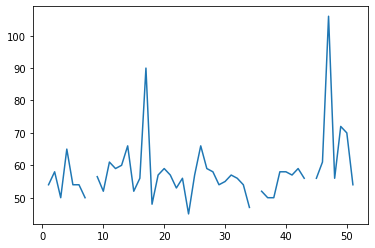

In [11]:
data[0].MAP.plot()